# Анализ видеоигр

## Цель проекта и основные шаги

Цель: Выявление факторов определяющие успешность игры

Шаги:
1. Считывание и изучение файла с общими данными
2. Подготовка данных
3. Исследовательский анализ
4. Портрет пользователя каждого региона
5. Проверка гипотез
6. Вывод

## Считывание и изучение файла с общими данными
### Отрытие файлов

In [1]:
from IPython.display import display
import matplotlib.pyplot as plt 
import seaborn as sns
import pandas as pd
from scipy import stats as st
import numpy as np
import os

pth1 = 'games.csv'
pth2 = '/datasets/games.csv'

if os.path.exists(pth1):
    data = pd.read_csv(pth1, sep=',')
elif os.path.exists(pth2):
    data = pd.read_csv(pth2, sep=',')
    
pd.set_option('display.max_columns', 500)    

In [2]:
display(data.head())

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


### Получение информации о файлах

In [3]:
display(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


None

### Вывод:
1. Название одной игры не хватет
2. Также нет Жанра по 2 играм
3. Релиз игр имеются пустые строки
4. Колонка год тип данных float
5. Столбец User_Score тип данных object

## Подготовка данных

In [4]:
data.columns = data.columns.str.lower()
display(data.head())

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [5]:
data.dropna(subset=['name', 'genre'], inplace=True)
data.reset_index(drop=True, inplace=True)
display(data.tail())


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
16708,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16709,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.0,NaN,NaN,NaN
16710,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16711,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.0,NaN,NaN,NaN
16712,Winning Post 8 2016,PSV,2016.0,Simulation,0.00,0.00,0.01,0.0,NaN,NaN,NaN


В столбце Имя и Жанр удалил 2 строки с пустыми значениями. Это незначительная инфомрация

In [6]:
data['year_of_release'] = pd.to_numeric(data['year_of_release'], errors='coerce').astype('Int64')
display(data.head())

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


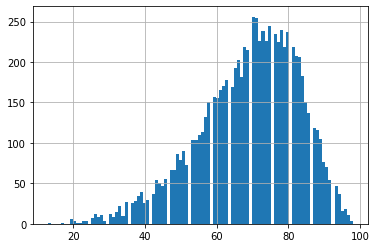

In [7]:
data['critic_score'].hist(bins=100);

In [8]:
data['critic_score'] = pd.to_numeric(data['critic_score'], errors='coerce').astype('Int64')
display(data.head())

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Столбец 'critic_score' пропущены значения но думаю, что критики просто не дали свою оценку, диапозон нормальный, пропущенные значения пока не заполняю

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16713 entries, 0 to 16712
Data columns (total 11 columns):
name               16713 non-null object
platform           16713 non-null object
year_of_release    16444 non-null Int64
genre              16713 non-null object
na_sales           16713 non-null float64
eu_sales           16713 non-null float64
jp_sales           16713 non-null float64
other_sales        16713 non-null float64
critic_score       8137 non-null Int64
user_score         7590 non-null float64
rating             9949 non-null object
dtypes: Int64(2), float64(5), object(4)
memory usage: 1.4+ MB


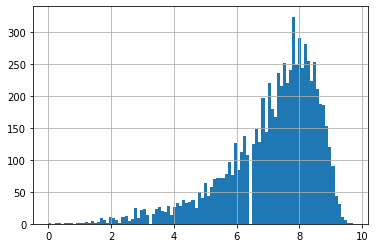

In [9]:
data['user_score'] = pd.to_numeric(data['user_score'], errors='coerce').astype('float64')
data['user_score'].hist(bins=100);
data.info()

Столбец 'user_score' пропущены значения но думаю, что пользователи просто не дали свою оценку, диапозон нормальный, пропущенные значения пока не заполняю

Значения tbd стали значениями NAN

In [10]:
# создал сводную таблци по игре и рейтингу
data_raiting_new = data.pivot_table(index=['name', 'rating'], values='na_sales', aggfunc='count').reset_index()
# нахожу строки с дублирующим значением игры, т.е игре присвоены 2 рейтинга, такого не может быть 
data_raiting_dublicated = data_raiting_new.query('name.duplicated(keep=False)')
#сортирую игры по количеству и по убыванию
data_raiting_dublicated_sort = data_raiting_dublicated.sort_values(by=['name','na_sales'], ascending=False)
# удаляю игры с рейтингом, которые меньше по значению
data_raiting_without_dubl = data_raiting_dublicated_sort.drop_duplicates(subset='name', keep='first')
del data_raiting_without_dubl['na_sales']
#получаю дополнительную таблицу с рейтингом игр у которых ранее были дублирующие значения
display(data_raiting_without_dubl)

,name,rating
6229,de Blob 2,E10+
6183,Ys: The Ark of Napishtim,E10+
6176,Young Justice: Legacy,T
6151,Xiaolin Showdown,E
6134,X2: Wolverine's Revenge,T
...,...,...
390,Batman: Rise of Sin Tzu,T
379,Batman Begins,T
368,Barnyard,E10+
314,Avatar: The Last Airbender,E10+


In [11]:
# в основную таблицу добавляю таблицу с новым рейтингом который не дублируется
data_new = data.merge(data_raiting_without_dubl, on='name', how='left')
# у меня получается возможность 5-ти вариатнов, вкратце примерно выглядит так:
# rating_x           rating_y
# E                  E
# NAN                NAN
# E                  NAN
# NAN                E
# E                  М
# Применяю where если rating_y == NAN, ставлю значение rating_x
# Также дополнительно заполнятся значение rating_x == NAN. 
data_new['rating_x'] = np.where(data_new['rating_y'].isna(), data_new['rating_x'], data_new['rating_y'])
display(data_new.head())


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating_x,rating_y
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E,NaN
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E,NaN
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E,NaN
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,NaN


In [12]:
# Получаю итоговую таблицу
del data_new['rating_y']
data = data_new.rename(columns={"rating_x": "rating"})
display(data.head())

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [13]:
data['rating'] = np.where(data['rating'] == "K-A", "E", data['rating'])
display(data.pivot_table(index='rating', values='na_sales', aggfunc='count'))

,na_sales
rating,
E,3945
E10+,1442
EC,8
M,1582
RP,2
T,2991


In [14]:
data['sum_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']
display(data.head())

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


### Вывод:

Изменили типы столбцов, без errors='coerce' это бы не получилось, так как имеются значения NAN и TBD

Удалили 2 строки с пустыми значениями Жанра

Привели к нижнему регистру названия столбцов


## Исследовательский анализ
### Количество выпускаемых игр в год

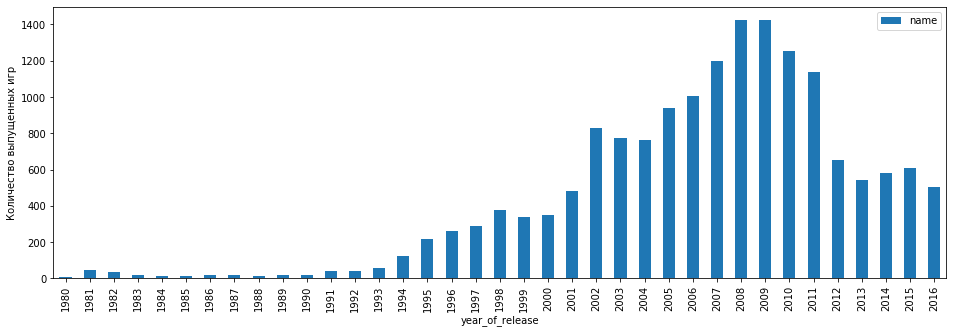

16444

In [15]:
data_year = data.pivot_table(index='year_of_release', values = 'name', aggfunc = 'count')
data_year.plot(kind='bar', figsize=(16, 5))
plt.ylabel("Количество выпущенных игр")
plt.show()
display(data_year['name'].sum())

#### Вывод
Больше всего игр выпускалось в 2008 и 2009 годах
* Помним что есть игры по которым не был указан год

### Продажи по платформам в год

In [29]:
data_platform_top = data.pivot_table(index='platform', values = 'sum_sales', aggfunc = 'sum').sort_values(by='sum_sales', ascending=False)
data_platform_top = data_platform_top.head(7)
display(data_platform_top)

,sum_sales
platform,
PS2,1255.77
X360,971.42
PS3,939.65
Wii,907.51
DS,806.12
PS,730.86
GBA,317.85


In [30]:
data_platform = data.pivot_table(index=['year_of_release','platform'], values = 'sum_sales', aggfunc = 'sum')
data_platform_sort = data_platform.reset_index().sort_values(by=['platform', 'year_of_release'], ascending=False)
data_platform_merged = data_platform_top.merge(data_platform_sort, on='platform', how='left')
display(data_platform_merged)

,platform,sum_sales_x,year_of_release,sum_sales_y
0,PS2,1255.77,2011,0.45
1,PS2,1255.77,2010,5.64
2,PS2,1255.77,2009,26.40
3,PS2,1255.77,2008,53.90
4,PS2,1255.77,2007,75.99
...,...,...,...,...
70,GBA,317.85,2004,77.91
71,GBA,317.85,2003,56.67
72,GBA,317.85,2002,74.16
73,GBA,317.85,2001,61.53


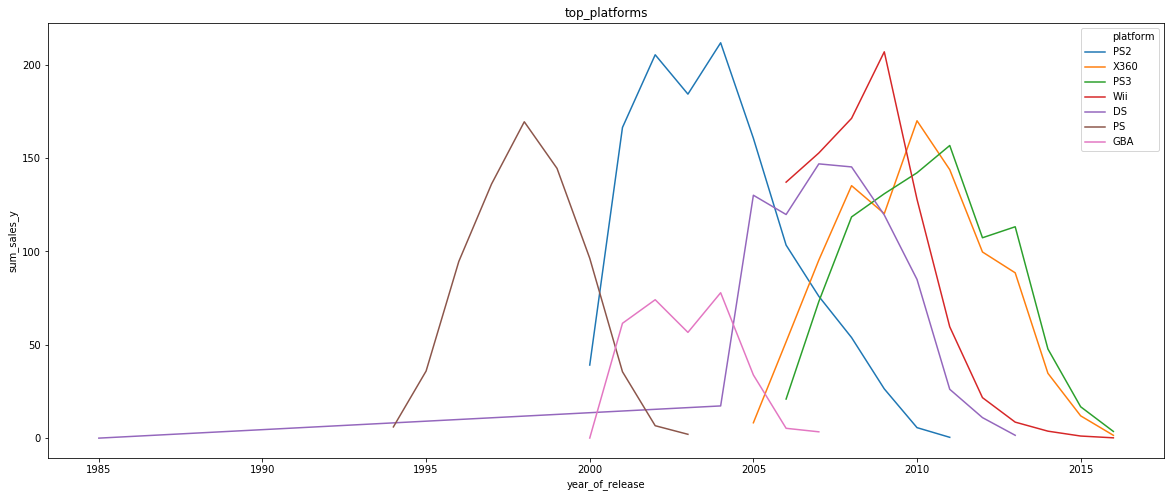

In [31]:
f, ax1 = plt.subplots(1, 1, figsize=(20, 8), sharex=True)
sns.lineplot(x="year_of_release", y="sum_sales_y",
             hue="platform",
             data=data_platform_merged)
ax1.set_title("top_platforms");

In [39]:
data_term= data_platform_sort.pivot_table(index='platform', values = 'year_of_release', aggfunc = 'count')
print('Средняя продолжитлеьность жизни платофрмы', data_term['year_of_release'].mean())


Средняя продолжитлеьность жизни платофрмы 7.67741935483871


#### Вывод

В более современные года можно увидеть закономерность, что в среднем платформа сущесвтует 5-6 лет

В 1 и 2 год конкурирует с прошлой моделю

В 1,2,3,4 год продажи платформы увеличиваются

В 5, 6 год конкурирует с новой моделью

### Актауальный период

In [40]:
data_period = data.query('year_of_release >= 2014')
display(data_period.head())
display(data_period.info())

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97,8.3,M,12.62
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,NaN,NaN,NaN,11.68
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82,4.3,E,8.58
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,NaN,7.98


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1689 entries, 31 to 16712
Data columns (total 12 columns):
name               1689 non-null object
platform           1689 non-null object
year_of_release    1689 non-null Int64
genre              1689 non-null object
na_sales           1689 non-null float64
eu_sales           1689 non-null float64
jp_sales           1689 non-null float64
other_sales        1689 non-null float64
critic_score       718 non-null Int64
user_score         888 non-null float64
rating             942 non-null object
sum_sales          1689 non-null float64
dtypes: Int64(2), float64(6), object(4)
memory usage: 174.8+ KB


None

#### Вывод
Основывая на результатх по платформам, можно понять что актуальные период будет не больше 5 лет, при этом необходимо убрать платформы котоыре уже отработали более 3-4 лет.

В связи с чем для 2017 года актуальный период 2014-2016 год

### Выбор платформ

In [41]:
data_period_platform = data_period.pivot_table(index='platform', values = 'sum_sales', aggfunc = 'sum')
display(data_period_platform.head(20))
display(len(data_period_platform))

,sum_sales
platform,
3DS,86.68
PC,27.05
PS3,68.18
PS4,288.15
PSP,0.36
PSV,22.40
Wii,5.07
WiiU,42.98
X360,48.22


10

In [42]:
data_period_platform_hight = data_period.query(
'platform != "PC" and platform != "PSP" and platform != "Wii" and platform != "PSV"'
                                                 )
data_period_platform_hight = data_period_platform_hight.reset_index()
display(len(data_period_platform_hight.pivot_table(index='platform', values = 'sum_sales', aggfunc = 'sum')))

6

#### Вывод
Выбрал 6 потенциальных платформ с высокими продажами

### Продажам игр в разбивке по платформам

,index,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
0,31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63
1,42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97,8.3,M,12.62
2,47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,NaN,NaN,NaN,11.68
3,77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82,4.3,E,8.58
4,87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,NaN,7.98


/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


(0, 6)

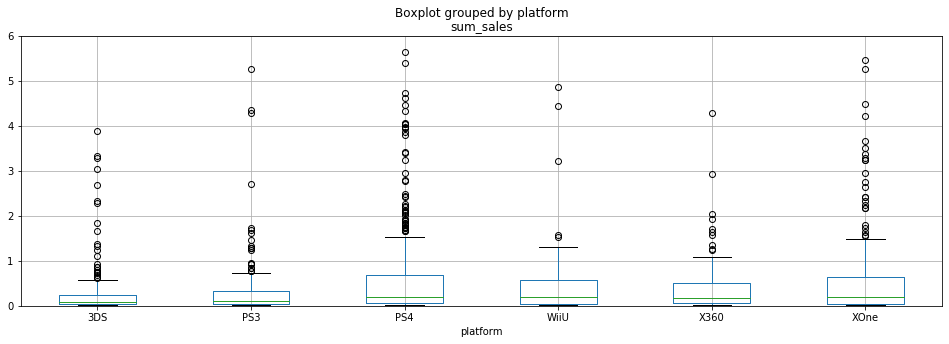

In [43]:
display(data_period_platform_hight.head())
boxplot = data_period_platform_hight.boxplot(column=['sum_sales'], by='platform', figsize=(16, 5))
plt.ylim(0, 6)

#### Вывод
В каждой платформе имеются выбросы, но такие выбросы реальны, так как возможно какая-то очень популярная игра продала много копий

Также почему-то у каждой платформы медианное значение почти одинаковое

### Изучение продаж платформы XOne

In [44]:
data_XOne = data_period_platform_hight.query('platform == "XOne"').reset_index()
data_XOne_final = data_XOne.dropna(subset=['critic_score', 'user_score'])
display(data_XOne_final.head())



,level_0,index,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
1,14,165,Grand Theft Auto V,XOne,2014,Action,2.81,2.19,0.00,0.47,97,7.9,M,5.47
2,16,179,Call of Duty: Advanced Warfare,XOne,2014,Shooter,3.22,1.55,0.01,0.48,81,5.4,M,5.26
3,21,242,Halo 5: Guardians,XOne,2015,Shooter,2.78,1.27,0.03,0.41,84,6.4,T,4.49
4,28,270,Fallout 4,XOne,2015,Role-Playing,2.51,1.32,0.01,0.38,88,6.2,M,4.22
6,39,373,Assassin's Creed: Unity,XOne,2014,Action,2.27,0.90,0.00,0.33,72,4.1,M,3.50


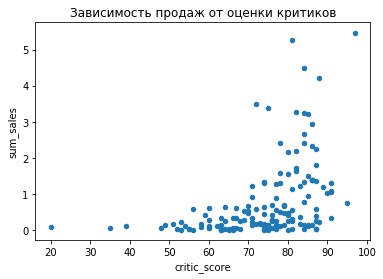

In [45]:
data_XOne_final.plot(x='critic_score', y='sum_sales', kind='scatter')
plt.title('Зависимость продаж от оценки критиков')
plt.show()

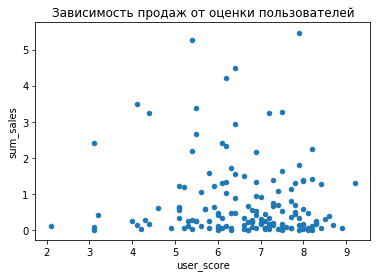

In [46]:
data_XOne_final.plot(x='user_score', y='sum_sales', kind='scatter')
plt.title('Зависимость продаж от оценки пользователей')
plt.show()

In [47]:
display(data_XOne_final['user_score'].corr(data_XOne_final['sum_sales']))
display(data_XOne_final['critic_score'].astype('int').corr(data_XOne_final['sum_sales']))


-0.0917343450331075

0.42211185105557647

#### Вывод
На графики и по коэфициенту корреляции можно понять, что зависимость оценки критиов от продаж больше, чем оценки пользователей. Это логично, так как пользователи ориентируются на оценки критиков перед покупкой игры. 

чем выше оченка, тем больше продаж

Зависимсоть критиков от продаж слабая
Зависиомть пользователей от продаж отсутствует

### Общая зависимость продаж от оценки критиков и пользователей

In [48]:
display(data_period_platform_hight['user_score'].corr(data_period_platform_hight['sum_sales']))
display(data_period_platform_hight['critic_score'].astype('float').corr(data_period_platform_hight['sum_sales']))


0.004264283332695287

0.3863209760179763

#### Вывод
Общие продажи к оценки пользователей отсутсвует

Зависимость общих прода к оценке критиков оченб слабая

### Продажи по жанрам

In [49]:
data_genre = data.pivot_table(index='genre', values = 'sum_sales', aggfunc = 'sum').sort_values(by='sum_sales', ascending=False)
data_period_genre = data_period.pivot_table(index='genre', values = 'sum_sales', aggfunc = 'sum').sort_values(by='sum_sales', ascending=False)
display(data_genre)
display(data_period_genre)

,sum_sales
genre,
Action,1744.17
Sports,1331.27
Shooter,1052.45
Role-Playing,934.56
Platform,827.77
Misc,802.51
Racing,728.67
Fighting,447.53
Simulation,389.97


,sum_sales
genre,
Action,199.36
Shooter,170.94
Sports,109.48
Role-Playing,101.44
Misc,37.55
Fighting,28.22
Racing,27.52
Platform,18.09
Adventure,17.55


#### Вывод

Рассматривая общую таблицу и талблицу за три года, можно понять общее, что ТРИ ТОП жанра Action, Sports, Shooter

Низкие продажи у Strategy, Puzzle, Simulation, Adventure

## Портрет пользователя каждого региона
### ТОП 5 платформ

In [58]:
top_region_eu = data_period.pivot_table(index='platform', values = 'eu_sales', aggfunc = 'sum').reset_index()
top_region_eu = top_region_eu.sort_values(by='eu_sales', ascending=False)
top_region_eu = top_region_eu.head()
sum_eu = top_region_eu['eu_sales'].sum()
top_region_eu['eu_share'] = top_region_eu['eu_sales'] / sum_eu
display(top_region_eu)

,platform,eu_sales,eu_share
3,PS4,130.04,0.551204
9,XOne,46.25,0.196041
2,PS3,25.54,0.108257
1,PC,17.97,0.076170
0,3DS,16.12,0.068328


In [59]:
top_region_na = data_period.pivot_table(index='platform', values = 'na_sales', aggfunc = 'sum').reset_index()
top_region_na = top_region_na.sort_values(by='na_sales', ascending=False)
top_region_na = top_region_na.head()
sum_na = top_region_na['na_sales'].sum()
top_region_na['na_share'] = top_region_na['na_sales'] / sum_na
display(top_region_na)

,platform,na_sales,na_share
3,PS4,98.61,0.389963
9,XOne,81.27,0.321390
8,X360,28.30,0.111915
0,3DS,22.64,0.089532
2,PS3,22.05,0.087199


In [60]:
top_region_jp = data_period.pivot_table(index='platform', values = 'jp_sales', aggfunc = 'sum').reset_index()
top_region_jp = top_region_jp.sort_values(by='jp_sales', ascending=False)
top_region_jp = top_region_jp.head()
sum_jp = top_region_jp['jp_sales'].sum()
top_region_jp['jp_share'] = top_region_jp['jp_sales'] / sum_jp
display(top_region_jp)

,platform,jp_sales,jp_share
0,3DS,44.24,0.479151
3,PS4,15.02,0.162677
5,PSV,14.54,0.157479
2,PS3,11.22,0.121521
7,WiiU,7.31,0.079173


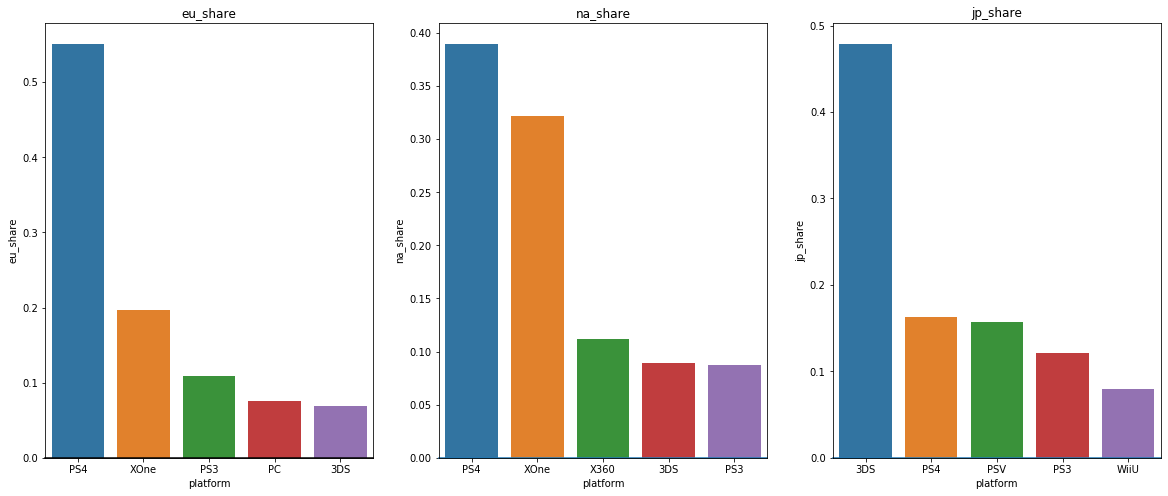

In [69]:
x1 = top_region_eu['platform']
x2 = top_region_na['platform']
x3 = top_region_jp['platform']
y1 = top_region_eu['eu_share']
y2 = top_region_na['na_share']
y3 = top_region_jp['jp_share']
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 8))

sns.barplot(x=x1, y=y1, ax=ax1)
ax1.axhline(0, color="k", clip_on=False)
ax1.set_title("eu_share")

sns.barplot(x=x2, y=y2, ax=ax2)
ax2.axhline(0, clip_on=False)
ax2.set_title("na_share")

sns.barplot(x=x3, y=y3, ax=ax3)
ax3.axhline(0, clip_on=False)
ax3.set_title("jp_share")

plt.show()              

#### Вывод
Из графика видно что:

в EU лидирует PS4
В NA лидирует PS4
В JP лидирует 3DS


### ТОП жанры

In [74]:
top_genre_eu = data_period.pivot_table(index='genre', values = 'eu_sales', aggfunc = 'sum').reset_index()
top_genre_eu = top_genre_eu.sort_values(by='eu_sales', ascending=False)
top_genre_eu = top_genre_eu.head()
sum_genre_eu = top_genre_eu['eu_sales'].sum()
top_genre_eu['eu_share'] = top_genre_eu['eu_sales'] / sum_genre_eu
display(top_genre_eu)

,genre,eu_sales,eu_share
0,Action,74.68,0.327214
8,Shooter,65.52,0.287079
10,Sports,45.73,0.200368
7,Role-Playing,28.17,0.123428
6,Racing,14.13,0.061911


In [75]:
top_genre_na = data_period.pivot_table(index='genre', values = 'na_sales', aggfunc = 'sum').reset_index()
top_genre_na = top_genre_na.sort_values(by='na_sales', ascending=False)
top_genre_na = top_genre_na.head()
sum_genre_na = top_genre_na['na_sales'].sum()
top_genre_na['na_share'] = top_genre_na['na_sales'] / sum_genre_na
display(top_genre_na)

,genre,na_sales,na_share
8,Shooter,79.02,0.320959
0,Action,72.53,0.294598
10,Sports,46.13,0.187368
7,Role-Playing,33.47,0.135946
3,Misc,15.05,0.061129


In [76]:
top_genre_jp = data_period.pivot_table(index='genre', values = 'jp_sales', aggfunc = 'sum').reset_index()
top_genre_jp = top_genre_jp.sort_values(by='jp_sales', ascending=False)
top_genre_jp = top_genre_jp.head()
sum__genre_jp = top_genre_jp['jp_sales'].sum()
top_genre_jp['jp_share'] = top_genre_jp['jp_sales'] / sum__genre_jp
display(top_genre_jp)

,genre,jp_sales,jp_share
7,Role-Playing,31.16,0.401598
0,Action,29.58,0.381235
2,Fighting,6.37,0.082098
3,Misc,5.61,0.072303
8,Shooter,4.87,0.062766


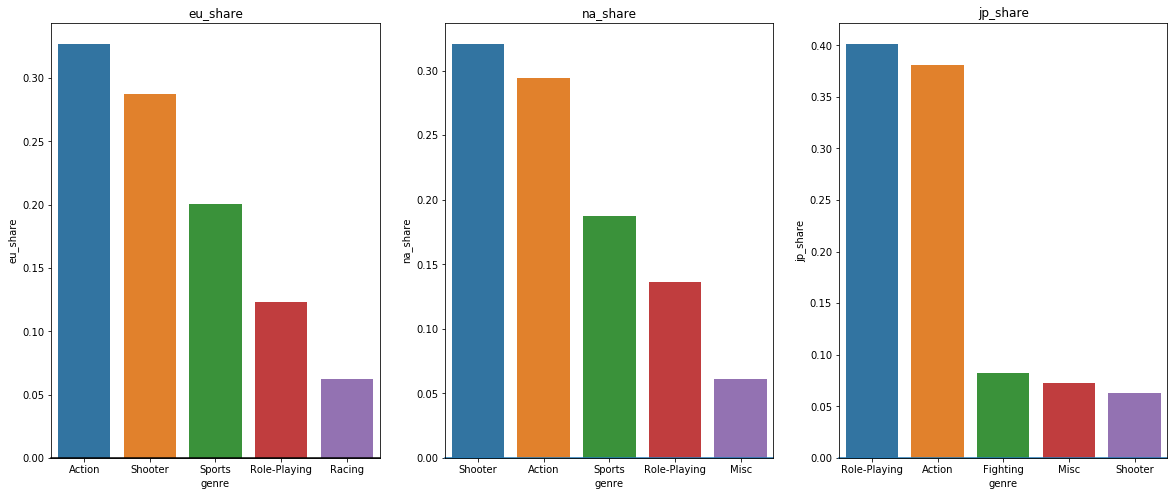

In [77]:
x1 = top_genre_eu['genre']
x2 = top_genre_na['genre']
x3 = top_genre_jp['genre']
y1 = top_genre_eu['eu_share']
y2 = top_genre_na['na_share']
y3 = top_genre_jp['jp_share']
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 8))

sns.barplot(x=x1, y=y1, ax=ax1)
ax1.axhline(0, color="k", clip_on=False)
ax1.set_title("eu_share")

sns.barplot(x=x2, y=y2, ax=ax2)
ax2.axhline(0, clip_on=False)
ax2.set_title("na_share")

sns.barplot(x=x3, y=y3, ax=ax3)
ax3.axhline(0, clip_on=False)
ax3.set_title("jp_share")

plt.show() 

#### Вывод
Из графика видно:

EU -Action

NA - Shooter

JP - Role_Playing


### Рейтинг ESRB продаж по регионам

In [79]:
data_period_rating = data_period.dropna(subset=['rating']).reset_index()
rating = data_period_rating.pivot_table(index='rating', values = ['na_sales', 'eu_sales', 'jp_sales'], aggfunc = 'sum').reset_index()
rating = rating.sort_values(by=['eu_sales', 'na_sales', 'jp_sales'], ascending=False).reset_index()
display(rating)

,index,rating,eu_sales,jp_sales,na_sales
0,2,M,93.44,8.01,96.42
1,0,E,57.94,8.91,49.55
2,3,T,34.05,14.78,38.93
3,1,E10+,26.35,4.49,34.49


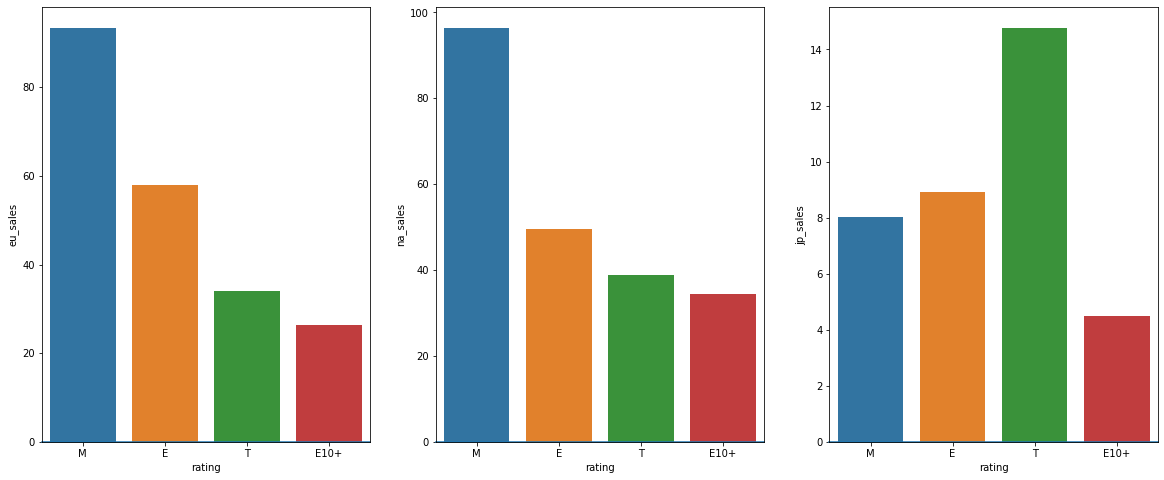

In [80]:
x = rating['rating']
y1 = rating['eu_sales']
y2 = rating['na_sales']
y3 = rating['jp_sales']
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 8), sharex=True)

sns.barplot(x=x, y=y1, ax=ax1)
ax1.axhline(0, clip_on=False)
ax1.set_ylabel("eu_sales")

sns.barplot(x=x, y=y2, ax=ax2)
ax2.axhline(0, clip_on=False)
ax2.set_ylabel("na_sales")

sns.barplot(x=x, y=y3, ax=ax3)
ax3.axhline(0, clip_on=False)
ax3.set_ylabel("jp_sales")

plt.show() 

#### Вывод
ESRB рейтинг влияет на продажи

Из графика видно что в EU и NA больше продаюся игры с рейтингом М, Е, Т, E10+

В JP ситуация координально отлицается лидирует T, E, M, E10+


## Проверка гипотез
### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

In [81]:
data_XOne = data.query('platform == "XOne"')
data_XOne = data_XOne.dropna(subset=['user_score']).reset_index()
data_PC = data.query('platform == "PC"')
data_PC = data_PC.dropna(subset=['user_score']).reset_index()

H0: Средний рейтинг Xbox One равен среднему рейтингу PC      
H1: Средний рейтинг не равны  

In [82]:
alpha = 0.05
results = st.ttest_ind(data_XOne['user_score'], data_PC['user_score'])


if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')


Отвергаем нулевую гипотезу


#### Вывод
Средние рейтинги не равны 

### Средние пользовательские рейтинги жанров Action и Sports разные

In [83]:
data_action = data.query('genre == "Action"')
data_action = data_action.dropna(subset=['user_score']).reset_index()
data_sports = data.query('genre == "Sports"')
data_sports = data_sports.dropna(subset=['user_score']).reset_index()

H0: Средний рейтинг Action равен среднему рейтингу Sports      
H1: Средний рейтинг не равны  

In [84]:
alpha = 0.05
results = st.ttest_ind(data_action['user_score'], data_sports['user_score'])


if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')


Не получилось отвергнуть нулевую гипотезу


#### Вывод
Средний рейтинг Action равен среднему рейтингу Sports

## Вывод

Проанализовал файл продаж и играми в разных регионах, для формирования заказа на 2017 год, необходимо учитывать:

1. Платформа. В среднем на платформой пользуются 5 лет, поэтому нельзя заказывать игры на старых платформах
2. Регион. Продажи в регионах отличаются особенно в Японии (странный вкус)
3. Жанр. ТОП это Action и Shooter
4. Обязательно смотреть на оценки критиков и пользователей, причем оценка критиков больше влиеят на продажи, чем оценка пользователя
5. рейтинг ESRB. Продажи зависят от возвратсной категории. В принципе это логично, так как аудитория и количество людей разное.